# CREATION OF CSV FILE

In [1]:
############################################################
##cleaned.csv formation
############################################################


import pandas as pd
import yfinance as yf


CONFIG_TARGET_INSTRUMENTS = ['JPM', 'MSFT', 'JNJ']
start_date = "2004-01-01"
end_date = "2024-01-01"
cut_off_date = pd.Timestamp("2023-01-01", tz='US/Pacific') ## CUT DATE FOR TRAINING AND TEST DATA
# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate over each instrument
for instrument in CONFIG_TARGET_INSTRUMENTS:
    # Download historical data using yfinance
    historical_data = yf.download(instrument, start=start_date, end=end_date)
    historical_data['instrument'] = instrument

    # Reset the index to make 'Date' a column
    historical_data = historical_data.reset_index()
    #historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d %H:%M:%S%z')
    historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d 16:00:00%z')
    historical_data['Date'] = pd.to_datetime(historical_data['Date'], format='%Y-%m-%d %H:%M:%S%z').dt.tz_localize('US/Pacific')


    # lower case columns
    historical_data.columns = historical_data.columns.str.lower()

    ####################################################


    # Calculate the Typical Price
    typical_price = (historical_data['high'] + historical_data['low'] + historical_data['close']) / 3

    # Calculate the Traded Value (Typical Price * Volume)
    traded_value = typical_price * historical_data['volume']

    # Calculate Cumulative Traded Value
    cumulative_traded_value = traded_value.cumsum()

    # Calculate Cumulative Volume
    cumulative_volume = historical_data['volume'].cumsum()

    # Calculate VWAP
    vwap = cumulative_traded_value / cumulative_volume

    historical_data['weightedAverage'] = vwap
    ####################################################

    historical_data['quoteVolume'] = historical_data['volume'] * historical_data['weightedAverage']
    ####################################################

    # Merge the current instrument's data with the combined data
    if combined_data.empty:
        combined_data = historical_data
    else:
        combined_data=pd.concat([combined_data,historical_data], axis=0, ignore_index=True)

# Sort the combined data by date
combined_data = combined_data.sort_values(by='date')

# Reset index for the final combined data
combined_data = combined_data.reset_index(drop=True)

# Define the desired order of columns
desired_order = ['date', 'instrument', 'high', 'low', 'open', 'close', 'volume', 'quoteVolume','weightedAverage']
combined_data = combined_data[desired_order]


####################################################
combined_data = combined_data.dropna()
####################################################
#rounding to 8 decimals
combined_data = combined_data.round(8)
#combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data.to_csv('cleaned.csv', index=False)
####################################################

# Display the result
combined_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,date,instrument,high,low,open,close,volume,quoteVolume,weightedAverage
0,2004-01-02 16:00:00-08:00,JPM,37.070000,36.529999,36.560001,36.619999,9280500,3.409656e+08,36.739999
1,2004-01-02 16:00:00-08:00,MSFT,27.770000,27.330000,27.580000,27.450001,44487700,1.224153e+09,27.516667
2,2004-01-02 16:00:00-08:00,JNJ,52.090000,51.400002,51.660000,51.660000,6463600,3.342758e+08,51.716667
3,2004-01-05 16:00:00-08:00,JPM,36.860001,36.299999,36.660000,36.549999,9715400,3.560991e+08,36.653053
4,2004-01-05 16:00:00-08:00,MSFT,28.180000,27.719999,27.730000,28.139999,67333700,1.872936e+09,27.815736
...,...,...,...,...,...,...,...,...,...
15094,2023-12-28 16:00:00-08:00,JPM,170.660004,169.000000,169.350006,170.300003,6320100,3.727234e+08,58.974282
15095,2023-12-28 16:00:00-08:00,MSFT,376.459991,374.160004,375.369995,375.279999,14327000,9.382485e+08,65.488133
15096,2023-12-29 16:00:00-08:00,MSFT,377.160004,373.480011,376.000000,376.040009,18723000,1.226598e+09,65.512897
15097,2023-12-29 16:00:00-08:00,JPM,170.690002,169.630005,170.000000,170.100006,6431800,3.793520e+08,58.980693


In [2]:
############################################################
##cleaned_preprocessed.csv formation
############################################################
import pandas as pd
FILE = "cleaned.csv"
df = pd.read_csv(FILE)
#INSTRUMENTS = ["AAPL","GOOGL","MSFT"]
#INSTRUMENTS = df['instrument'].unique().tolist()
INSTRUMENTS = CONFIG_TARGET_INSTRUMENTS
############################################################

COLS = ['high', 'low', 'open', 'close', 'volume', 'quoteVolume','weightedAverage']
SCOLS = ["vh","vl","vc","open_s","volume_s","quoteVolume_s","weightedAverage_s"]
OBS_COLS = ['vh', 'vl', 'vc', 'open_s', 'volume_s', 'quoteVolume_s', 'weightedAverage_s', 'vh_roll_7', 'vh_roll_14', 'vh_roll_30', 'vl_roll_7', 'vl_roll_14', 'vl_roll_30', 'vc_roll_7', 'vc_roll_14', 'vc_roll_30', 'open_s_roll_7', 'open_s_roll_14', 'open_s_roll_30', 'volume_s_roll_7', 'volume_s_roll_14', 'volume_s_roll_30', 'quoteVolume_s_roll_7', 'quoteVolume_s_roll_14', 'quoteVolume_s_roll_30', 'weightedAverage_s_roll_7', 'weightedAverage_s_roll_14', 'weightedAverage_s_roll_30']
EPISODE_LENGTH = 500


df["date"] = df["date"].apply(lambda x: pd.Timestamp(x, unit='s', tz='US/Pacific'))
df = df[df["instrument"].isin(INSTRUMENTS)].sort_values("date")
df["vh"] = df["high"]/df["open"]
df["vl"] = df["low"]/df["open"]
df["vc"] = df["close"]/df["open"]
df["open_s"] = df.groupby("instrument")["open"].apply(lambda x: x - x.shift(1))
df["volume_s"] = df.groupby("instrument")["volume"].apply(lambda x: x - x.shift(1))
df["quoteVolume_s"] = df.groupby("instrument")["quoteVolume"].apply(lambda x: x - x.shift(1))
df["weightedAverage_s"] = df.groupby("instrument")["weightedAverage"].apply(lambda x: x - x.shift(1))

new_cols = []

for col in SCOLS:
    print(col)
    df[col+"_roll_7"] = df.groupby("instrument")[col].apply(lambda x: x.rolling(7).mean().bfill())
    new_cols.append(col+"_roll_7")
    df[col+"_roll_14"] = df.groupby("instrument")[col].apply(lambda x: x.rolling(14).mean().bfill())
    new_cols.append(col+"_roll_14")
    df[col+"_roll_30"] = df.groupby("instrument")[col].apply(lambda x: x.rolling(30).mean().bfill())
    new_cols.append(col+"_roll_30")

SCOLS.extend(new_cols)
print(SCOLS)
###############################
df = df.dropna()
df = df.reset_index(drop=True)


# Filter data based on the cut-off date
train_data = df[df['date'] < cut_off_date]
test_data = df[df['date'] >= cut_off_date]


# Save the preprocessed datasets
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

<ipython-input-2-aba62877be96>:23: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["open_s"] = df.groupby("instrument")["open"].apply(lambda x: x - x.shift(1))
<ipython-input-2-aba62877be96>:24: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["volume_s"] = df.groupby("instrument")["volume"].ap

vh
vl
vc
open_s
volume_s
quoteVolume_s
weightedAverage_s
['vh', 'vl', 'vc', 'open_s', 'volume_s', 'quoteVolume_s', 'weightedAverage_s', 'vh_roll_7', 'vh_roll_14', 'vh_roll_30', 'vl_roll_7', 'vl_roll_14', 'vl_roll_30', 'vc_roll_7', 'vc_roll_14', 'vc_roll_30', 'open_s_roll_7', 'open_s_roll_14', 'open_s_roll_30', 'volume_s_roll_7', 'volume_s_roll_14', 'volume_s_roll_30', 'quoteVolume_s_roll_7', 'quoteVolume_s_roll_14', 'quoteVolume_s_roll_30', 'weightedAverage_s_roll_7', 'weightedAverage_s_roll_14', 'weightedAverage_s_roll_30']





# PREPARATION

In [3]:
##########################
###some libraries and imports
##########################
!pip install --upgrade -q tensorflow #needs to be 2.15
#one more library
!pip install -q tf-agents


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 40.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.9 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tqdm import tqdm
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.policies.policy_saver import PolicySaver
from tf_agents.agents.ddpg import actor_network
from tf_agents.agents.ddpg import critic_network
from tf_agents.agents.ddpg import ddpg_agent
from tf_agents.agents.dqn import dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.trajectories import policy_step
from tf_agents.utils import common
import logging
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [5]:
##########################
###config.py: HYPERPARAMETERS
##########################

# Number of training iterations
CONFIG_NUM_ITERATIONS = 100
# Number of steps in each episode, specifies the number of time steps or interactions that make up a single episode in the reinforcement learning environment.
CONFIG_EPISODE_LENGTH = 100
# Number of steps to collect data in each iteration, determines the number of steps the agent will take in the environment to collect experiences during each iteration of the training loop.
CONFIG_COLLECT_STEPS_PER_ITERATION = 750

##############################
# Maximum length of the replay buffer
CONFIG_REPLAY_BUFFER_MAX_LENGTH = 100
# Batch size for training
CONFIG_BATCH_SIZE = 100
# Number of episodes for evaluation
CONFIG_NUM_EVAL_EPISODES = 4
###############################
 # Logging frequency, log training information every X steps
CONFIG_LOG_INTERVAL = 3
# Evaluation frequency, evaluate the agent every X steps
CONFIG_EVAL_INTERVAL = 3
# Frequency to save the model, save the model every X steps
CONFIG_MODEL_SAVE_FREQ = 3
# Fully connected layers for the actor network
CONFIG_actor_fc_layers=(200, 100)
# Fully connected layers for the critic network's observation branch
CONFIG_critic_obs_fc_layers=(200,)
# Fully connected layers for the critic network's action branch
CONFIG_critic_action_fc_layers=None
# Fully connected layers for the joint critic network
CONFIG_critic_joint_fc_layers=(150,)
# Standard deviation for Ornstein-Uhlenbeck noise
CONFIG_ou_stddev=0.5
# Damping factor for Ornstein-Uhlenbeck noise
CONFIG_ou_damping=0.3
# Soft update coefficient for target networks
CONFIG_target_update_tau=0.001
# Update target networks every 15 steps
CONFIG_target_update_period=15
# Clipping value for gradients with respect to actions
CONFIG_dqda_clipping=None
# Loss function for TD errors # TRY MSE
CONFIG_td_errors_loss_fn=tf.compat.v1.losses.huber_loss
# Discount factor
CONFIG_gamma=0.15
# Scaling factor for rewards
CONFIG_reward_scale_factor=1
# Clipping value for gradients during training
CONFIG_gradient_clipping=None
# Learning rate for the actor network
CONFIG_actor_learning_rate=1e-4
# Learning rate for the critic network
CONFIG_critic_learning_rate=1e-3
###############################
# Enable debug summaries
CONFIG_debug_summaries=False
# Summarize gradients and variables during training
CONFIG_summarize_grads_and_vars=False
###############################
# storage directories
CONFIG_LOGDIR="LOGDIR"
CONFIG_MODEL_SAVE = "model_save"

In [6]:
##########################
###config.py: ASSETS
##########################

CONFIG_FILE = "train_data.csv"
CONFIG_INSTRUMENTS_placeholder = ['ASST1', 'ASST2', 'ASST3']
CONFIG_INSTRUMENTS = CONFIG_TARGET_INSTRUMENTS
CONFIG_COLS = ['high', 'low', 'open', 'close', 'volume', 'quoteVolume', 'weightedAverage']
CONFIG_SCOLS = ['vh', 'vl', 'vc', 'open_s', 'volume_s', 'quoteVolume_s', 'weightedAverage_s', 'vh_roll_7', \
                'vh_roll_14', 'vh_roll_30', 'vl_roll_7', 'vl_roll_14', 'vl_roll_30', 'vc_roll_7', 'vc_roll_14', 'vc_roll_30', \
                'open_s_roll_7', 'open_s_roll_14', 'open_s_roll_30', 'volume_s_roll_7', 'volume_s_roll_14', 'volume_s_roll_30', \
                'quoteVolume_s_roll_7', 'quoteVolume_s_roll_14', 'quoteVolume_s_roll_30', 'weightedAverage_s_roll_7', \
                'weightedAverage_s_roll_14', 'weightedAverage_s_roll_30']
CONFIG_OBS_COLS = ['ASST1_vh', 'ASST2_vh', 'ASST3_vh', 'ASST1_vl', 'ASST2_vl', 'ASST3_vl', 'ASST1_vc', 'ASST2_vc', 'ASST3_vc', \
    'ASST1_open_s', 'ASST2_open_s', 'ASST3_open_s', 'ASST1_volume_s', 'ASST2_volume_s', 'ASST3_volume_s', 'ASST1_quoteVolume_s', \
        'ASST2_quoteVolume_s', 'ASST3_quoteVolume_s', 'ASST1_weightedAverage_s', 'ASST2_weightedAverage_s', 'ASST3_weightedAverage_s', \
            'ASST1_vh_roll_7', 'ASST2_vh_roll_7', 'ASST3_vh_roll_7', 'ASST1_vh_roll_14', 'ASST2_vh_roll_14', 'ASST3_vh_roll_14', \
                'ASST1_vh_roll_30', 'ASST2_vh_roll_30', 'ASST3_vh_roll_30', 'ASST1_vl_roll_7', 'ASST2_vl_roll_7', 'ASST3_vl_roll_7', \
                    'ASST1_vl_roll_14', 'ASST2_vl_roll_14', 'ASST3_vl_roll_14', 'ASST1_vl_roll_30', 'ASST2_vl_roll_30', 'ASST3_vl_roll_30', \
                        'ASST1_vc_roll_7', 'ASST2_vc_roll_7', 'ASST3_vc_roll_7', 'ASST1_vc_roll_14', 'ASST2_vc_roll_14', 'ASST3_vc_roll_14', \
                            'ASST1_vc_roll_30', 'ASST2_vc_roll_30', 'ASST3_vc_roll_30', 'ASST1_open_s_roll_7', 'ASST2_open_s_roll_7', \
                                'ASST3_open_s_roll_7', 'ASST1_open_s_roll_14', 'ASST2_open_s_roll_14', 'ASST3_open_s_roll_14', 'ASST1_open_s_roll_30', \
                                    'ASST2_open_s_roll_30', 'ASST3_open_s_roll_30', 'ASST1_volume_s_roll_7', 'ASST2_volume_s_roll_7', 'ASST3_volume_s_roll_7', \
                                        'ASST1_volume_s_roll_14', 'ASST2_volume_s_roll_14', 'ASST3_volume_s_roll_14', 'ASST1_volume_s_roll_30',\
                                             'ASST2_volume_s_roll_30', 'ASST3_volume_s_roll_30', 'ASST1_quoteVolume_s_roll_7', 'ASST2_quoteVolume_s_roll_7', \
                                                 'ASST3_quoteVolume_s_roll_7', 'ASST1_quoteVolume_s_roll_14', 'ASST2_quoteVolume_s_roll_14', \
                                                     'ASST3_quoteVolume_s_roll_14', 'ASST1_quoteVolume_s_roll_30', 'ASST2_quoteVolume_s_roll_30', \
                                                         'ASST3_quoteVolume_s_roll_30', 'ASST1_weightedAverage_s_roll_7', 'ASST2_weightedAverage_s_roll_7', \
                                                             'ASST3_weightedAverage_s_roll_7', 'ASST1_weightedAverage_s_roll_14', 'ASST2_weightedAverage_s_roll_14',\
                                                                  'ASST3_weightedAverage_s_roll_14', 'ASST1_weightedAverage_s_roll_30', 'ASST2_weightedAverage_s_roll_30', 'ASST3_weightedAverage_s_roll_30']
# Perform the replacement of placeholders.
CONFIG_OBS_COLS = [col.replace(placeholder, instrument) for col, placeholder, instrument in zip(CONFIG_OBS_COLS, CONFIG_INSTRUMENTS_placeholder * len(CONFIG_OBS_COLS), CONFIG_INSTRUMENTS * len(CONFIG_OBS_COLS))]

#####################################################
# Checkining contets of CONFIG_OBS_COLS
inline_string = ', '.join(CONFIG_OBS_COLS)
# Printing the result
print(inline_string)

JPM_vh, MSFT_vh, JNJ_vh, JPM_vl, MSFT_vl, JNJ_vl, JPM_vc, MSFT_vc, JNJ_vc, JPM_open_s, MSFT_open_s, JNJ_open_s, JPM_volume_s, MSFT_volume_s, JNJ_volume_s, JPM_quoteVolume_s, MSFT_quoteVolume_s, JNJ_quoteVolume_s, JPM_weightedAverage_s, MSFT_weightedAverage_s, JNJ_weightedAverage_s, JPM_vh_roll_7, MSFT_vh_roll_7, JNJ_vh_roll_7, JPM_vh_roll_14, MSFT_vh_roll_14, JNJ_vh_roll_14, JPM_vh_roll_30, MSFT_vh_roll_30, JNJ_vh_roll_30, JPM_vl_roll_7, MSFT_vl_roll_7, JNJ_vl_roll_7, JPM_vl_roll_14, MSFT_vl_roll_14, JNJ_vl_roll_14, JPM_vl_roll_30, MSFT_vl_roll_30, JNJ_vl_roll_30, JPM_vc_roll_7, MSFT_vc_roll_7, JNJ_vc_roll_7, JPM_vc_roll_14, MSFT_vc_roll_14, JNJ_vc_roll_14, JPM_vc_roll_30, MSFT_vc_roll_30, JNJ_vc_roll_30, JPM_open_s_roll_7, MSFT_open_s_roll_7, JNJ_open_s_roll_7, JPM_open_s_roll_14, MSFT_open_s_roll_14, JNJ_open_s_roll_14, JPM_open_s_roll_30, MSFT_open_s_roll_30, JNJ_open_s_roll_30, JPM_volume_s_roll_7, MSFT_volume_s_roll_7, JNJ_volume_s_roll_7, JPM_volume_s_roll_14, MSFT_volume_s_roll_

# ENVIROMENTS AND TRAINING


In [7]:
##########################
###environments.py
##########################

tf.compat.v1.enable_v2_behavior()

#class defines the reinforcement learning environment
class AssetTradingEnv(py_environment.PyEnvironment):


    def __init__(self):
        self._action_spec = array_spec.BoundedArraySpec(
            (len(CONFIG_INSTRUMENTS)+1,), np.float64, minimum=0, maximum=1, name='action')
        self._observation_spec = array_spec.BoundedArraySpec(
            shape=(len(CONFIG_OBS_COLS),), dtype=np.float64, \
                     name='observation')
        self.reset()
        self._episode_ended = False
        self.us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self.memory_return = pd.DataFrame(columns=[t+"_close" for t in CONFIG_INSTRUMENTS])
        self._episode_ended = False
        self.index = 0
        self.time_delta = pd.Timedelta(1,unit='D')
        self.init_cash = 1000000
        self.current_cash = self.init_cash
        self.current_value = self.init_cash
        self.previous_price = {}
        self.old_dict_instrument_price_1 = {}
        self.old_dict_instrument_price_2 = {}

        self.money_split_ratio = np.zeros((len(CONFIG_INSTRUMENTS)+1))
        self.money_split_ratio[0] = 1

        self.df = pd.read_csv(CONFIG_FILE)
        self.scaler = preprocessing.StandardScaler()

        self.df["date"] = self.df["date"].apply(lambda x: pd.Timestamp(x, unit='s', tz='US/Pacific'))
        self.df = self.df[self.df["instrument"].isin(CONFIG_INSTRUMENTS)].sort_values("date")
        self.scaler.fit(self.df[CONFIG_SCOLS].values)
        self.df = self.df.reset_index(drop=True)

        self.max_index = self.df.shape[0]
        start_point = (np.random.choice(np.arange(3,self.max_index - CONFIG_EPISODE_LENGTH))//3) *3
        end_point = start_point + CONFIG_EPISODE_LENGTH//3 *3
        self.df = self.df.loc[start_point:end_point+2].reset_index(drop=True)


        self.df = self.df.reset_index(drop=True)


        self.init_time = self.df.loc[0,"date"]
        self.current_time = self.init_time
        self.dfslice = self.df[(self.df["instrument"].isin(CONFIG_INSTRUMENTS))&(self.df["date"]>=self.current_time)&(self.df["date"]<self.current_time+pd.Timedelta(1,unit='D'))].copy().drop_duplicates("instrument")

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()

        self.step_reward = 0

        info_ =  {"state":"state",\
                "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                "value":self.current_value,"time":self.current_time,\
                "reward":self.step_reward,\
                # "raw_output":self.get_observations_unscaled(),
                "scaled_output":self.get_observations()}
        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False

        return ts.restart(self._state)

    def _step(self, action):

        if self._episode_ended:

            return self.reset()
        if sum(action)<=1e-3:
            self.money_split_ratio = [1/len(action) for t in action]
        else:
            self.money_split_ratio = action/sum(action)

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.step_time()
        self.index +=1

        info_ =  {"state":"state",\
                    "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                    "value":self.current_value,"time":self.current_time,\
                    "reward":self.step_reward,\
                    "scaled_output":self.get_observations()}

        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False
        if self._episode_ended:
            reward = 0
            return ts.termination(self._state , reward)
        else:
            try:
                return ts.transition(
                    self._state, reward=reward, discount=1)
            except Exception as e:
                print("ERRORRRRRR!!!!!!!!!!!!!!!!")
                print(self._state)
                print(reward)
                print(self.step_reward, self.current_value, self.previous_value)
                print(self.current_stock_money_distribution)
                print(self.current_stock_num_distribution)
                print(action)
                print(self.index)
                print(self.dfslice)
                print(self.current_time)
                print(self.money_split_ratio )
                print(e)
                self.df.to_csv(os.path.join(LOGDIR,"error_df.csv"))

                raise ValueError

    def step_time(self):
        while True:
            self.current_time += self.time_delta
            self.current_time = pd.Timestamp(self.current_time)  # Convert to Timestamp


            self.dfslice = self.df[
                (self.df["instrument"].isin(CONFIG_INSTRUMENTS)) &
                (self.df["date"] >= self.current_time) &
                (self.df["date"] < self.current_time + pd.Timedelta(1, unit='D'))
            ].copy().drop_duplicates("instrument")



            # Check if dfslice is empty, and if so, continue to the next valid business day
            if not self.dfslice.empty:
                break

        # print("DataFrame shape after slicing:", self.dfslice.shape)
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()
        self.step_reward = (self.current_value - self.previous_value) / self.previous_value  # CHANGE FOR RELATIVE OR ABSOLUTE RETURNS
        # self.step_reward = np.min([self.step_reward,0.25])


    def get_observations(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(self.scaler.transform(grp[CONFIG_SCOLS].values))
            tempdf.columns = [i+"_"+c for c in CONFIG_SCOLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        return dfs
    def get_observations_unscaled(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(grp[CONFIG_COLS].values)
            tempdf.columns = [i+"_"+c for c in CONFIG_COLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        self.memory_return = pd.concat([self.memory_return,dfs[[t+"_close" for t in CONFIG_INSTRUMENTS]]],ignore_index=True)

        return dfs
    def calculate_actual_shares_from_money_split(self):
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]

        num_shares = []
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//dict_instrument_price[c] )
            else:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//self.old_dict_instrument_price_1[c] )

        self.current_cash = self.money_split_ratio[0]*self.current_value
        for c in dict_instrument_price:
            self.old_dict_instrument_price_1[c] = dict_instrument_price[c]

        return num_shares
    def calculate_money_from_num_stocks(self):
        money_dist = []
        money_dist.append(self.current_cash)
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                money_dist.append(self.current_stock_num_distribution[i]*dict_instrument_price[c])
            else:
                money_dist.append(self.current_stock_num_distribution[i]*self.old_dict_instrument_price_2[c])

        for c in dict_instrument_price:
            self.old_dict_instrument_price_2[c] = dict_instrument_price[c]
        return money_dist,sum(money_dist)
    def normalize_money_dist(self):
        normal = []

        for i,c in enumerate(self.current_stock_money_distribution):
            normal.append(c/self.current_value)
        return normal

In [8]:
##########################
###utils.py
##########################

def compute_avg_return(environment, policy, num_episodes=10):

        total_return = 0.0
        for _ in range(num_episodes):

            time_step = environment.reset()
            episode_return = 0.0
            counter = 0
            while not time_step.is_last():
                action_step = policy.action(time_step)
                time_step = environment.step(action_step.action)
                episode_return += time_step.reward

                counter+=1
            total_return += episode_return

        avg_return = total_return / num_episodes
        return avg_return.numpy()[0]

def collect_step(environment, policy, buffer):
        time_step = environment.current_time_step()
        action_step = policy.action(time_step)
        next_time_step = environment.step(action_step.action)
        traj = trajectory.from_transition(time_step, action_step, next_time_step)

        # Add trajectory to the replay buffer
        buffer.add_batch(traj)
def collect_data(env, policy, buffer, steps):
        for _ in range(steps):
            collect_step(env, policy, buffer)


In [9]:

##########################
###train.py
##########################

tf.compat.v1.enable_v2_behavior()
os.makedirs(CONFIG_LOGDIR,exist_ok=True)
os.makedirs(CONFIG_MODEL_SAVE,exist_ok=True)
logging.basicConfig(filename=os.path.join(CONFIG_LOGDIR,'log.log'),
level=logging.INFO,
format='%(asctime)s | %(name)s | %(levelname)s | %(message)s')
if __name__=='__main__':
    train_py_env = AssetTradingEnv()
    eval_py_env = AssetTradingEnv()

    train_env = tf_py_environment.TFPyEnvironment(train_py_env)
    eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)
    actor_fc_layers = CONFIG_actor_fc_layers
    critic_obs_fc_layers = CONFIG_critic_obs_fc_layers
    critic_action_fc_layers = CONFIG_critic_action_fc_layers
    critic_joint_fc_layers = CONFIG_critic_joint_fc_layers
    ou_stddev = CONFIG_ou_stddev
    ou_damping = CONFIG_ou_damping
    target_update_tau = CONFIG_target_update_tau
    target_update_period = CONFIG_target_update_period
    dqda_clipping = CONFIG_dqda_clipping
    td_errors_loss_fn = CONFIG_td_errors_loss_fn
    gamma = CONFIG_gamma
    reward_scale_factor = CONFIG_reward_scale_factor
    gradient_clipping = CONFIG_gradient_clipping

    actor_learning_rate = CONFIG_actor_learning_rate
    critic_learning_rate = CONFIG_critic_learning_rate
    debug_summaries = CONFIG_debug_summaries
    summarize_grads_and_vars = CONFIG_summarize_grads_and_vars

    global_step = tf.compat.v1.train.get_or_create_global_step()

    actor_net = actor_network.ActorNetwork(
            train_env.time_step_spec().observation,
            train_env.action_spec(),
            fc_layer_params=actor_fc_layers,
        )

    critic_net_input_specs = (train_env.time_step_spec().observation,
                            train_env.action_spec())

    critic_net = critic_network.CriticNetwork(
        critic_net_input_specs,
        observation_fc_layer_params=critic_obs_fc_layers,
        action_fc_layer_params=critic_action_fc_layers,
        joint_fc_layer_params=critic_joint_fc_layers,
    )

    tf_agent = ddpg_agent.DdpgAgent(
        train_env.time_step_spec(),
        train_env.action_spec(),
        actor_network=actor_net,
        critic_network=critic_net,
        actor_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=actor_learning_rate),
        critic_optimizer=tf.compat.v1.train.AdamOptimizer(
            learning_rate=critic_learning_rate),
        ou_stddev=ou_stddev,
        ou_damping=ou_damping,
        target_update_tau=target_update_tau,
        target_update_period=target_update_period,
        dqda_clipping=dqda_clipping,
        td_errors_loss_fn=td_errors_loss_fn,
        gamma=gamma,
        reward_scale_factor=reward_scale_factor,
        gradient_clipping=gradient_clipping,
        debug_summaries=debug_summaries,
        summarize_grads_and_vars=summarize_grads_and_vars,
        train_step_counter=global_step)
    tf_agent.initialize()

    random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                    train_env.action_spec())

    replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
        data_spec=tf_agent.collect_data_spec,
        batch_size=train_env.batch_size,
        max_length=CONFIG_REPLAY_BUFFER_MAX_LENGTH)

    collect_data(train_env, random_policy, replay_buffer, steps=100)

    dataset = replay_buffer.as_dataset(
        num_parallel_calls=3,
        sample_batch_size=CONFIG_BATCH_SIZE,
        num_steps=2).prefetch(3)

    my_policy = tf_agent.collect_policy
    saver = PolicySaver(my_policy, batch_size=None)

    iterator = iter(dataset)
    tf_agent.train = common.function(tf_agent.train)

    # Reset the train step
    tf_agent.train_step_counter.assign(0)

    # Evaluate the agent's policy once before training.
    avg_return = compute_avg_return(eval_env, tf_agent.policy, \
                                    CONFIG_NUM_EVAL_EPISODES)
    returns = [avg_return]
    iterations=[0]
    training_losses = []

    for _ in tqdm(range(CONFIG_NUM_ITERATIONS),total=CONFIG_NUM_ITERATIONS):
            # Collect a few steps using collect_policy and save to the replay buffer.
            for _ in range(CONFIG_COLLECT_STEPS_PER_ITERATION):
                collect_step(train_env, tf_agent.collect_policy, replay_buffer)

            # Sample a batch of data from the buffer and update the agent's network.
            experience, unused_info = next(iterator)
            train_loss = tf_agent.train(experience).loss

            step = tf_agent.train_step_counter.numpy()





            if step % CONFIG_LOG_INTERVAL == 0:
                print('step = {0}: loss = {1}'.format(step, train_loss))
                training_losses.append(train_loss)

            if step % CONFIG_EVAL_INTERVAL == 0:
                avg_return = compute_avg_return(eval_env, tf_agent.policy, \
                                                CONFIG_NUM_EVAL_EPISODES)
                print('step = {0}: Average Return = {1}'.format(step, avg_return))
                logging.info('step = {0}: Average Return = {1}'.format(step, avg_return))
                returns.append(avg_return)
                iterations.append(step)
            if step % CONFIG_MODEL_SAVE_FREQ == 0:
                saver.save(os.path.join(CONFIG_MODEL_SAVE,f'policy_step_{step}_gamma.mdl'))




    pd.DataFrame({"interations":iterations,"Return":returns}).to_csv(os.path.join(CONFIG_LOGDIR,"output_ar_gamma.csv"),index=None)



Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.
  2%|▏         | 2/100 [01:31<1:12:09, 44.17s/it]

step = 3: loss = 5.032764238421805e-05


step = 3: Average Return = 0.04071827977895737


  5%|▌         | 5/100 [03:30<1:03:07, 39.87s/it]

step = 6: loss = 3.131021367153153e-05
step = 6: Average Return = 0.027751723304390907


  8%|▊         | 8/100 [05:25<58:45, 38.32s/it]  

step = 9: loss = 1.9799850633717142e-05
step = 9: Average Return = 0.005747129209339619


 11%|█         | 11/100 [07:21<56:36, 38.16s/it]

step = 12: loss = 2.681678597582504e-05
step = 12: Average Return = -0.03740168735384941


 14%|█▍        | 14/100 [09:18<54:45, 38.21s/it]

step = 15: loss = 2.1373258277890272e-05
step = 15: Average Return = 0.014526844024658203


 17%|█▋        | 17/100 [11:19<54:24, 39.34s/it]

step = 18: loss = 4.0698054363019764e-05
step = 18: Average Return = 0.014079777523875237


 20%|██        | 20/100 [13:12<50:29, 37.87s/it]

step = 21: loss = 1.7472742911195382e-05
step = 21: Average Return = 0.01664336584508419


 23%|██▎       | 23/100 [15:06<47:59, 37.40s/it]

step = 24: loss = 3.760363324545324e-05
step = 24: Average Return = 0.04159323871135712


 26%|██▌       | 26/100 [17:01<46:15, 37.50s/it]

step = 27: loss = 3.275985363870859e-05
step = 27: Average Return = 0.00307313259691


 29%|██▉       | 29/100 [18:55<44:07, 37.29s/it]

step = 30: loss = 3.970089164795354e-05
step = 30: Average Return = -0.06776852905750275


 32%|███▏      | 32/100 [20:53<43:41, 38.56s/it]

step = 33: loss = 2.7662737920763902e-05
step = 33: Average Return = -0.013220908120274544


 35%|███▌      | 35/100 [22:48<41:02, 37.89s/it]

step = 36: loss = 1.5024543245090172e-05
step = 36: Average Return = 0.0032483397517353296


 38%|███▊      | 38/100 [24:39<38:10, 36.94s/it]

step = 39: loss = 1.1562773579498753e-05
step = 39: Average Return = -0.004738558083772659


 41%|████      | 41/100 [26:33<36:28, 37.09s/it]

step = 42: loss = 1.8605369405122474e-05
step = 42: Average Return = 0.008041270077228546


 44%|████▍     | 44/100 [28:24<34:19, 36.78s/it]

step = 45: loss = 2.178969225496985e-05
step = 45: Average Return = -0.010163532570004463


 47%|████▋     | 47/100 [30:17<32:34, 36.88s/it]

step = 48: loss = 3.8228889025049284e-05
step = 48: Average Return = 1.8278835341334343e-05


 50%|█████     | 50/100 [32:12<31:08, 37.37s/it]

step = 51: loss = 1.5079502190928906e-05
step = 51: Average Return = -0.007826360873878002


 53%|█████▎    | 53/100 [34:11<29:57, 38.25s/it]

step = 54: loss = 0.0001774089760147035
step = 54: Average Return = 0.007013103924691677


 56%|█████▌    | 56/100 [36:07<27:59, 38.16s/it]

step = 57: loss = 1.8090449884766713e-05
step = 57: Average Return = -0.008373009040951729


 59%|█████▉    | 59/100 [38:03<25:59, 38.05s/it]

step = 60: loss = 4.637944948626682e-05
step = 60: Average Return = 0.017156925052404404


 62%|██████▏   | 62/100 [39:58<23:53, 37.73s/it]

step = 63: loss = 2.409367880318314e-05
step = 63: Average Return = 0.008551806211471558


 65%|██████▌   | 65/100 [41:56<22:13, 38.11s/it]

step = 66: loss = 3.931843093596399e-05
step = 66: Average Return = 0.03521377220749855


 68%|██████▊   | 68/100 [43:52<20:18, 38.08s/it]

step = 69: loss = 5.339615745469928e-05
step = 69: Average Return = -0.003585012862458825


 71%|███████   | 71/100 [45:49<18:26, 38.17s/it]

step = 72: loss = 7.945097422634717e-06
step = 72: Average Return = 0.018505195155739784


 74%|███████▍  | 74/100 [47:42<16:15, 37.52s/it]

step = 75: loss = 2.0485975255724043e-05
step = 75: Average Return = 0.05267205089330673


 77%|███████▋  | 77/100 [49:38<14:29, 37.82s/it]

step = 78: loss = 2.7088395654573105e-05
step = 78: Average Return = -0.0032345009967684746


 80%|████████  | 80/100 [51:34<12:39, 37.98s/it]

step = 81: loss = 2.0681194655480795e-05
step = 81: Average Return = -0.011285590007901192


 83%|████████▎ | 83/100 [53:32<10:52, 38.38s/it]

step = 84: loss = 8.361727850569878e-06
step = 84: Average Return = 0.04500647634267807


 86%|████████▌ | 86/100 [55:30<09:00, 38.63s/it]

step = 87: loss = 1.0135600859939586e-05
step = 87: Average Return = -0.0004795924760401249


 89%|████████▉ | 89/100 [57:26<07:00, 38.20s/it]

step = 90: loss = 7.112957973731682e-05
step = 90: Average Return = 0.007921379059553146


 92%|█████████▏| 92/100 [59:25<05:07, 38.45s/it]

step = 93: loss = 7.893376459833235e-05
step = 93: Average Return = 0.03732360154390335


 95%|█████████▌| 95/100 [1:01:22<03:11, 38.40s/it]

step = 96: loss = 1.907118348754011e-05
step = 96: Average Return = 0.01349166501313448


 98%|█████████▊| 98/100 [1:03:19<01:16, 38.37s/it]

step = 99: loss = 3.2251544325845316e-05
step = 99: Average Return = 0.007180282846093178


100%|██████████| 100/100 [1:04:39<00:00, 38.79s/it]


# TEST PART


##EVALUATION ENVIRONMENT


In [10]:
##########################
###environments.py
##########################

tf.compat.v1.enable_v2_behavior()

class AssetTradingEnv(py_environment.PyEnvironment):


    def __init__(self):
        self._action_spec = array_spec.BoundedArraySpec(
            (len(CONFIG_INSTRUMENTS)+1,), np.float64, minimum=0, maximum=1, name='action')
        self._observation_spec = array_spec.BoundedArraySpec(
            shape=(len(CONFIG_OBS_COLS),), dtype=np.float64, \
                     name='observation')
        self.reset()
        self._episode_ended = False

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self.memory_return = pd.DataFrame(columns=[t+"_close" for t in CONFIG_INSTRUMENTS])
        self._episode_ended = False
        self.index = 0
        self.time_delta = pd.Timedelta(1,unit='D')
        self.init_cash = 1000000
        self.current_cash = self.init_cash
        self.current_value = self.init_cash
        self.previous_price = {}
        self.old_dict_instrument_price_1 = {}
        self.old_dict_instrument_price_2 = {}

        self.money_split_ratio = np.zeros((len(CONFIG_INSTRUMENTS)+1))
        self.money_split_ratio[0] = 1

        self.df = pd.read_csv(CONFIG_FILE)
        self.scaler = preprocessing.StandardScaler()

        self.df["date"] = self.df["date"].apply(lambda x: pd.Timestamp(x, unit='s', tz='US/Pacific'))
        self.df = self.df[self.df["instrument"].isin(CONFIG_INSTRUMENTS)].sort_values("date")
        self.scaler.fit(self.df[CONFIG_SCOLS].values)
        self.df = self.df.reset_index(drop=True)

        self.max_index = self.df.shape[0]
        start_point = 0
        end_point = start_point + CONFIG_EPISODE_LENGTH//3 * 3
        self.df = self.df.loc[start_point:end_point+2].reset_index(drop=True)


        self.df = self.df.reset_index(drop=True)


        self.init_time = self.df.loc[0,"date"]
        self.current_time = self.init_time
        self.dfslice = self.df[(self.df["instrument"].isin(CONFIG_INSTRUMENTS))&(self.df["date"]>=self.current_time)&(self.df["date"]<self.current_time+pd.Timedelta(1,unit='D'))].copy().drop_duplicates("instrument")

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()

        self.step_reward = 0

        info_ =  {"state":"state",\
                "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                "value":self.current_value,"time":self.current_time,\
                "reward":self.step_reward,\
                # "raw_output":self.get_observations_unscaled(),
                "scaled_output":self.get_observations()}
        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False


        return ts.restart(self._state)

    def _step(self, action):

        if self._episode_ended:

            return self.reset()
        if sum(action)<=1e-3:
            self.money_split_ratio = [1/len(action) for t in action]
        else:
            self.money_split_ratio = action/sum(action)

        self.current_stock_num_distribution = self.calculate_actual_shares_from_money_split()
        self.step_time()
        self.index +=1

        info_ =  {"state":"state",\
                    "money_split":self.money_split_ratio,"share_num":self.current_stock_num_distribution,\
                    "value":self.current_value,"time":self.current_time,\
                    "reward":self.step_reward,\
                    "scaled_output":self.get_observations()}

        self._state = info_["scaled_output"][CONFIG_OBS_COLS].values.flatten()
        reward = info_["reward"]
        self._episode_ended = True if self.index==CONFIG_EPISODE_LENGTH//3 else False
        if self._episode_ended:
            reward = 0
            return ts.termination(self._state , reward)
        else:
            try:
                return ts.transition(
                    self._state, reward=reward, discount=1)
            except Exception as e:
                print("ERRORRRRRR!!!!!!!!!!!!!!!!")
                print(self._state)
                print(reward)
                print(self.step_reward, self.current_value, self.previous_value)
                print(self.current_stock_money_distribution)
                print(self.current_stock_num_distribution)
                print(action)
                print(self.index)
                print(self.dfslice)
                print(self.current_time)
                print(self.money_split_ratio )
                print(e)


                raise ValueError

    def step_time(self):
        while True:
            self.current_time += self.time_delta
            self.current_time = pd.Timestamp(self.current_time)  # Convert to Timestamp
            # print("Debugging Info - step_time:")
            # print("Current time:", self.current_time)

            # # Print min and max dates in the DataFrame
            # print("DataFrame min date:", self.df["date"].min())
            # print("DataFrame max date:", self.df["date"].max())

            self.dfslice = self.df[
                (self.df["instrument"].isin(CONFIG_INSTRUMENTS)) &
                (self.df["date"] >= self.current_time) &
                (self.df["date"] < self.current_time + pd.Timedelta(1, unit='D'))
            ].copy().drop_duplicates("instrument")

            # print("DataFrame shape after slicing:", self.dfslice.shape)

            # Check if dfslice is empty, and if so, continue to the next valid business day
            if not self.dfslice.empty:
                break

        # print("DataFrame shape after slicing:", self.dfslice.shape)
        self.previous_value = self.current_value
        self.current_stock_money_distribution,self.current_value  = self.calculate_money_from_num_stocks()
        self.money_split_ratio = self.normalize_money_dist()
        self.step_reward = (self.current_value - self.previous_value) / self.previous_value


    def get_observations(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(self.scaler.transform(grp[CONFIG_SCOLS].values))
            tempdf.columns = [i+"_"+c for c in CONFIG_SCOLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        return dfs
    def get_observations_unscaled(self):
        dfslice = self.dfslice
        dfs = pd.DataFrame()
        for i,grp in dfslice.groupby("instrument"):
            tempdf = pd.DataFrame(grp[CONFIG_COLS].values)
            tempdf.columns = [i+"_"+c for c in CONFIG_COLS]
            if dfs.empty:
                dfs = tempdf
            else:
                dfs = dfs.merge(tempdf,right_index=True,left_index=True,how='inner')

        self.memory_return = pd.concat([self.memory_return,dfs[[t+"_close" for t in CONFIG_INSTRUMENTS]]],ignore_index=True)

        return dfs
    def calculate_actual_shares_from_money_split(self):
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]

        num_shares = []
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//dict_instrument_price[c] )
            else:
                num_shares.append( self.money_split_ratio[i+1]*self.current_value//self.old_dict_instrument_price_1[c] )

        self.current_cash = self.money_split_ratio[0]*self.current_value
        for c in dict_instrument_price:
            self.old_dict_instrument_price_1[c] = dict_instrument_price[c]

        return num_shares
    def calculate_money_from_num_stocks(self):
        money_dist = []
        money_dist.append(self.current_cash)
        dict_instrument_price = self.dfslice[["instrument","open"]]\
                        .set_index("instrument").to_dict()["open"]
        for i,c in enumerate(CONFIG_INSTRUMENTS):
            if c in dict_instrument_price:
                money_dist.append(self.current_stock_num_distribution[i]*dict_instrument_price[c])
            else:
                money_dist.append(self.current_stock_num_distribution[i]*self.old_dict_instrument_price_2[c])

        for c in dict_instrument_price:
            self.old_dict_instrument_price_2[c] = dict_instrument_price[c]
        return money_dist,sum(money_dist)
    def normalize_money_dist(self):
        normal = []

        for i,c in enumerate(self.current_stock_money_distribution):
            normal.append(c/self.current_value)
        return normal

##EVALUATION ( SET ON STEP 96 SAVE- CHANGE FOR LESS STEPS)

In [11]:
eval_py_env = AssetTradingEnv()
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

loaded_policy = tf.compat.v2.saved_model.load('/content/model_save/policy_step_96_gamma.mdl') # CHANGE FOR SHORTER PERIODS
eval_policy = loaded_policy
CONFIG_EPISODE_LENGTH = 747
CONFIG_FILE = "test_data.csv"
CONFIG_NUM_EVAL_EPISODES = 1
all_returns = []
all_weights = []

for _ in range(CONFIG_NUM_EVAL_EPISODES):
    time_step = eval_env.reset()
    episode_returns = []
    episode_weights = []

    while not time_step.is_last():
        action_step = eval_policy.action(time_step)
        time_step = eval_env.step(action_step.action)

        # Append the return at each time step
        episode_returns.append(time_step.reward.numpy())
        weights = tf.nn.softmax(action_step.action.numpy()[0])
        episode_weights.append(weights)

    # Append the returns for the current episode
    all_returns.append(episode_returns)
    all_weights.append(episode_weights)

average_returns = np.mean(all_returns)
print(average_returns)
episode_returns = [arr * 100 for arr in episode_returns]

4.838024e-05


# WEIGHT PLOT

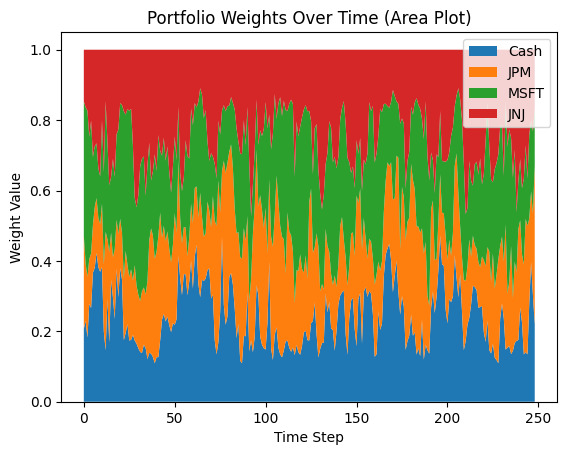

In [12]:
# WEIGHTS PLOTTING
# Assuming `weights_array` contains your data
weights_array = np.array(episode_weights)

# Extract the time steps
time_steps = np.arange(weights_array.shape[0])

plt.stackplot(time_steps,weights_array.T)
plt.xlabel('Time Step')
plt.ylabel('Weight Value')
plt.legend(labels = ['Cash', CONFIG_TARGET_INSTRUMENTS[0],CONFIG_TARGET_INSTRUMENTS[1],CONFIG_TARGET_INSTRUMENTS[2]])
plt.title('Portfolio Weights Over Time (Area Plot)')
plt.show()

# CALCULATE DDPG PORTFOLIO VALUE

In [13]:
# Set the initial investment
initial_investment_euros = 100

portfolio_absolute_returns = pd.Series(episode_returns)


# Calculate the portfolio value over time
portfolio_value = portfolio_absolute_returns.cumsum() + initial_investment_euros

# Create a DataFrame for visualization (optional)
portfolio_df = pd.DataFrame({
    'Date': portfolio_absolute_returns.index,  # Assuming the index represents dates
    'Portfolio Value': portfolio_value
})



#CALCULATE EQUALLY WEIGHTED PORTFOLIO RETURNS


In [14]:
df = pd.read_csv('test_data.csv', parse_dates=["date"])
df

,date,instrument,high,low,open,close,volume,quoteVolume,weightedAverage,vh,...,open_s_roll_30,volume_s_roll_7,volume_s_roll_14,volume_s_roll_30,quoteVolume_s_roll_7,quoteVolume_s_roll_14,quoteVolume_s_roll_30,weightedAverage_s_roll_7,weightedAverage_s_roll_14,weightedAverage_s_roll_30
0,2023-01-03 16:00:00-08:00,JPM,136.740005,133.889999,135.240005,135.119995,11054800,6.293687e+08,56.931713,1.011091,...,0.108000,4.290143e+05,158085.714286,74486.666667,2.446846e+07,9.058299e+06,4.298908e+06,0.005458,0.006583,0.006605
1,2023-01-03 16:00:00-08:00,MSFT,245.750000,237.399994,243.080002,239.580002,25740000,1.494684e+09,58.068537,1.010984,...,0.176667,2.927714e+05,-351792.857143,87216.666667,1.740731e+07,-1.965383e+07,5.581972e+06,0.017159,0.025249,0.022377
2,2023-01-03 16:00:00-08:00,JNJ,178.380005,176.009995,176.160004,178.190002,6344900,5.702788e+08,89.879875,1.012602,...,0.105333,1.247000e+05,104464.285714,62693.333333,1.125220e+07,9.452349e+06,5.690482e+06,0.008073,0.012926,0.012458
3,2023-01-04 16:00:00-08:00,JPM,137.679993,135.570007,135.990005,136.380005,11687600,6.654950e+08,56.940260,1.012427,...,0.047333,4.342000e+05,118728.571429,73970.000000,2.477403e+07,6.827414e+06,4.274989e+06,0.005848,0.006681,0.006666
4,2023-01-04 16:00:00-08:00,MSFT,232.869995,225.960007,232.279999,229.100006,50623400,2.941555e+09,58.106626,1.002540,...,-0.374333,3.138814e+06,601892.857143,766996.666667,1.829406e+08,3.604207e+07,4.519993e+07,0.019359,0.025313,0.022900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2023-12-28 16:00:00-08:00,JNJ,157.240005,155.990005,156.000000,156.580002,4377500,4.126912e+08,94.275544,1.007949,...,0.278667,-4.077000e+05,-153921.428571,-77870.000000,-3.838761e+07,-1.444854e+07,-7.279111e+06,0.006711,0.009565,0.009254
746,2023-12-28 16:00:00-08:00,MSFT,376.459991,374.160004,375.369995,375.279999,14327000,9.382485e+08,65.488133,1.002904,...,0.145333,-1.067986e+06,-627992.857143,-445230.000000,-6.943429e+07,-4.032512e+07,-2.816855e+07,0.023212,0.034645,0.035715
747,2023-12-29 16:00:00-08:00,JPM,170.690002,169.630005,170.000000,170.100006,6431800,3.793520e+08,58.980693,1.004059,...,0.718000,-5.591286e+05,-66742.857143,-64450.000000,-3.290707e+07,-3.870250e+06,-3.736503e+06,0.006836,0.008999,0.007747
748,2023-12-29 16:00:00-08:00,MSFT,377.160004,373.480011,376.000000,376.040009,18723000,1.226598e+09,65.512897,1.003085,...,0.157333,-2.686714e+05,-101557.142857,-271236.666667,-1.712970e+07,-5.957807e+06,-1.681947e+07,0.022896,0.034525,0.035370


In [15]:
ASST1_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[0]].reset_index(drop=True)
ASST2_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[1]].reset_index(drop=True)
ASST3_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[2]].reset_index(drop=True)

# Calculate returns for each coin
ASST1_returns = ASST1_values['close'].pct_change().dropna() / 3
ASST2_returns = ASST2_values['close'].pct_change().dropna() / 3
ASST3_returns = ASST3_values['close'].pct_change().dropna() / 3

# Create a new array with equally weighted returns
equally_weighted_returns = ASST1_returns + ASST2_returns + ASST3_returns

# Create a DataFrame for visualization (optional)
returns_equally_weighted = pd.DataFrame({
    CONFIG_TARGET_INSTRUMENTS[0]: ASST1_returns,
    CONFIG_TARGET_INSTRUMENTS[1]: ASST2_returns,
    CONFIG_TARGET_INSTRUMENTS[2]: ASST3_returns,
    'equally_weighted': equally_weighted_returns
})

# Display the result
print(returns_equally_weighted['equally_weighted'][0:250])

1     -0.007844
2     -0.014858
3      0.013010
4     -0.006768
5      0.004726
         ...   
245    0.002064
246    0.003501
247    0.001923
248    0.003340
249    0.000624
Name: equally_weighted, Length: 249, dtype: float64


# EW PORTFOLIO VALUE

In [16]:
# Set the initial investment
initial_investment = 100  # in euros

# Calculate the portfolio value at each time step
portfolio_values = (1 + returns_equally_weighted['equally_weighted']).cumprod() * initial_investment

# Create a DataFrame to visualize the results
portfolio_value_equally_weighted = pd.DataFrame({
    'Date': returns_equally_weighted.index,  # Assuming the index represents dates
    'Portfolio Value': portfolio_values
})

# Display the result
print(portfolio_value_equally_weighted)

     Date  Portfolio Value
1       1        99.215640
2       2        97.741502
3       3        99.013135
4       4        98.343002
5       5        98.807807
..    ...              ...
245   245       120.692576
246   246       121.115068
247   247       121.347939
248   248       121.753186
249   249       121.829187

[249 rows x 2 columns]


#STOCKS PLOTTING

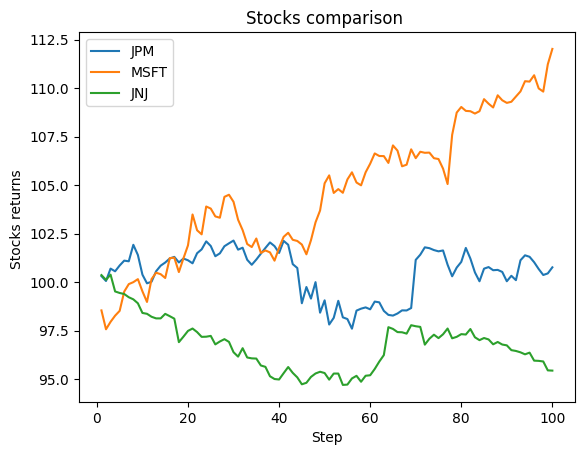

In [19]:
ASST1_portofolio =(1 + returns_equally_weighted[CONFIG_TARGET_INSTRUMENTS[0]]).cumprod() * initial_investment
ASST2_portfolio =(1 + returns_equally_weighted[CONFIG_TARGET_INSTRUMENTS[1]]).cumprod() * initial_investment
ASST3_portfolio =(1 + returns_equally_weighted[CONFIG_TARGET_INSTRUMENTS[2]]).cumprod() * initial_investment
plt.plot(ASST1_portofolio[0:100])
plt.plot(ASST2_portfolio[0:100])
plt.plot(ASST3_portfolio[0:100])
plt.xlabel('Step')
plt.ylabel('Stocks returns ')
plt.title('Stocks comparison ')
plt.legend(labels=[CONFIG_TARGET_INSTRUMENTS[0], CONFIG_TARGET_INSTRUMENTS[1],CONFIG_TARGET_INSTRUMENTS[2]])
plt.show()

#COMPARISON PLOT

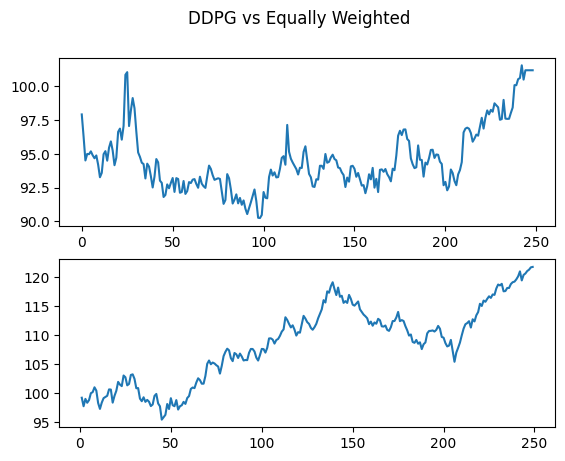

In [20]:
fig, axs = plt.subplots(2)
fig.suptitle('DDPG vs Equally Weighted')
axs[0].plot(portfolio_df['Portfolio Value'])
axs[1].plot(portfolio_value_equally_weighted['Portfolio Value'][0:250])

In [24]:
ASST1_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[0]].reset_index(drop=True)
ASST2_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[1]].reset_index(drop=True)
ASST3_values = df[df['instrument'] == CONFIG_TARGET_INSTRUMENTS[2]].reset_index(drop=True)

# Calculate returns for each stock
ASST1_returns = ASST1_values['close'].pct_change().dropna() / 4
ASST2_returns = ASST2_values['close'].pct_change().dropna() / 4
ASST3_returns = ASST3_values['close'].pct_change().dropna() / 4
cash_returns = pd.Series([0] * len(ASST1_returns), name='cash')


# Create a new array with equally weighted returns
equally_weighted_returns_cash = ASST1_returns + ASST2_returns + ASST3_returns + cash_returns

# Create a DataFrame for visualization
returns_equally_weighted_cash = pd.DataFrame({
    CONFIG_TARGET_INSTRUMENTS[0]: ASST1_returns,
    CONFIG_TARGET_INSTRUMENTS[1]: ASST2_returns,
    CONFIG_TARGET_INSTRUMENTS[2]: ASST3_returns,
    'Cash': cash_returns,
    'Equally Weighted': equally_weighted_returns_cash
})

# Set the initial investment
initial_investment = 100  # in euros

# Calculate the portfolio value at each time step
portfolio_values = (1 + returns_equally_weighted_cash['Equally Weighted']).cumprod() * initial_investment

# Create a DataFrame to visualize the results
portfolio_value_equally_weighted_cash = pd.DataFrame({
    'Date': returns_equally_weighted_cash.index,  # Assuming the index represents dates
    'Portfolio Value': portfolio_values
})

# Display the result
print(portfolio_value_equally_weighted_cash)

     Date  Portfolio Value
0       0              NaN
1       1        99.411730
2       2        98.303942
3       3        99.263154
4       4        98.759285
..    ...              ...
245   245       115.339583
246   246       115.642398
247   247       115.809160
248   248       116.099222
249   249              NaN

[250 rows x 2 columns]


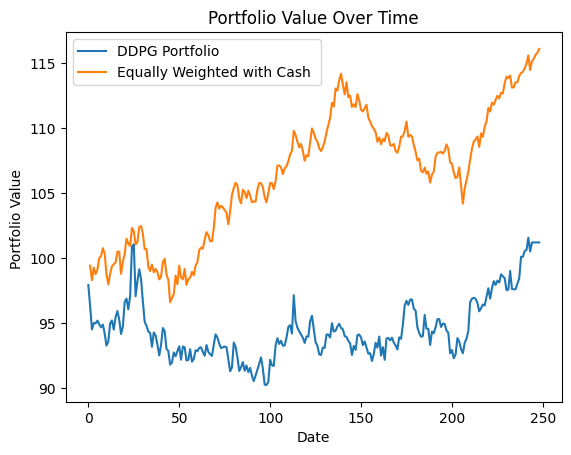

In [25]:
# Plot the portfolio value vs the equally weighted over time WITH CASH
plt.plot(portfolio_df['Portfolio Value'])
plt.plot(portfolio_value_equally_weighted_cash['Portfolio Value'][0:250])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ')
plt.title('Portfolio Value Over Time')
plt.legend(labels=['DDPG Portfolio ', 'Equally Weighted with Cash '])
plt.show()

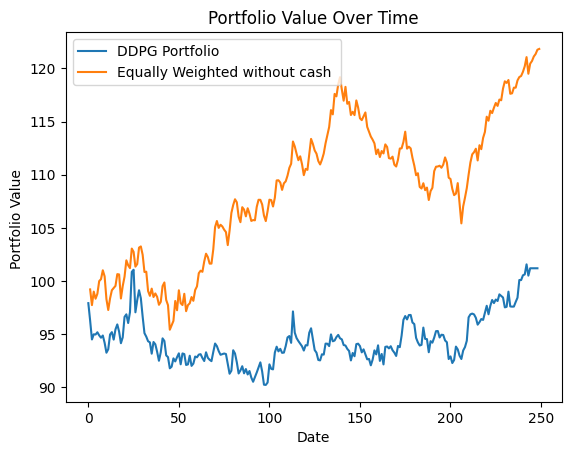

In [26]:
# Plot the portfolio value vs the equally weighted over time WITHOUT CASH
plt.plot(portfolio_df['Portfolio Value'])
plt.plot(portfolio_value_equally_weighted['Portfolio Value'][0:250])
plt.xlabel('Date')
plt.ylabel('Portfolio Value ')
plt.title('Portfolio Value Over Time')
plt.legend(labels=['DDPG Portfolio ', 'Equally Weighted without cash '])
plt.show()

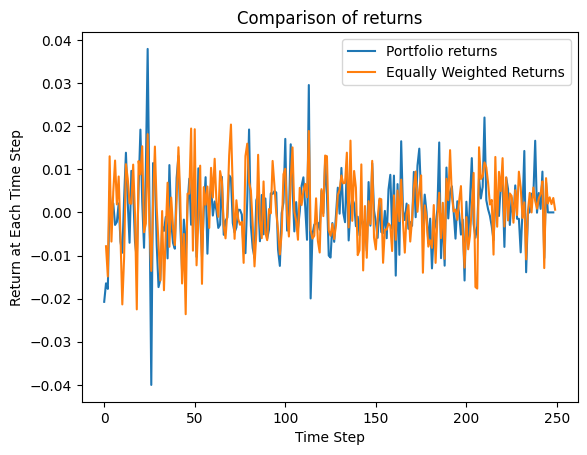

In [27]:

plt.plot([arr /100 for arr in episode_returns])
plt.plot(returns_equally_weighted['equally_weighted'][0:250])
plt.ylabel('Return at Each Time Step')
plt.xlabel('Time Step')
plt.title('Comparison of returns')
plt.legend(labels=['Portfolio returns', 'Equally Weighted Returns'])
plt.show()

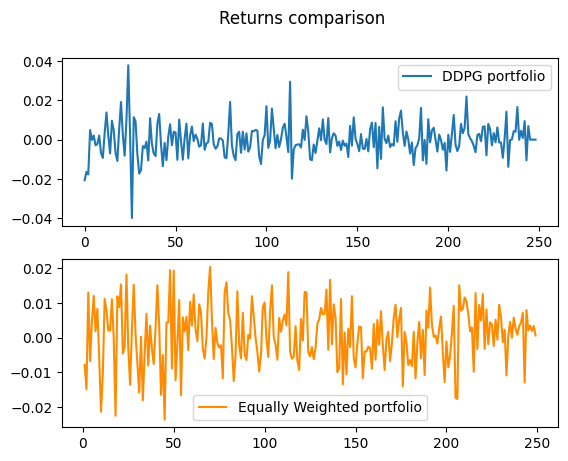

In [28]:
fig, axs = plt.subplots(2)
fig.suptitle('Returns comparison')
axs[0].plot([arr /100 for arr in episode_returns],label= 'DDPG portfolio')
axs[1].plot(returns_equally_weighted['equally_weighted'][0:250], color = '#FF8C00', label= 'Equally Weighted portfolio')
axs[0].legend()
axs[1].legend()

# METRICS

In [29]:
def calculate_metrics(portfolio_returns, portfolio_name):
    portfolio_returns = np.array(portfolio_returns)
    portfolio_returns = portfolio_returns[~np.isnan(portfolio_returns)]
    # Calculate metrics
    average_return = np.mean(portfolio_returns)
    volatility = np.std(portfolio_returns)
    sharpe_ratio = average_return / volatility

    # Assuming a target return of 0 for Sortino Ratio
    downside_returns = np.minimum(0, portfolio_returns - 0)
    downside_deviation = np.sqrt(np.mean(downside_returns ** 2))
    sortino_ratio = average_return / downside_deviation

    # Calculate overall return (cumulative return)
    overall_return = np.prod(1 + portfolio_returns) - 1

    # Create a DataFrame
    metrics_dict = {
        "Volatility": volatility,
        "Average Return": average_return,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Overall Return": overall_return
    }

    return pd.DataFrame(metrics_dict , index=[portfolio_name])


In [30]:
portfolio_DDPG_metrics = calculate_metrics([arr /10 for arr in episode_returns],'portfolio_DDPG')
EW_portfolio_metrics = calculate_metrics(returns_equally_weighted['equally_weighted'],'EW_portfolio')


all_portfolios_metrics = pd.concat([portfolio_DDPG_metrics, EW_portfolio_metrics ])

# Save to CSV
all_portfolios_metrics.to_csv('portfolio_metrics.csv')
all_portfolios_metrics.to_excel('portfolio_metrics_DDPG.xlsx')
# Print results
print("Portfolio DDPG Metrics:", portfolio_DDPG_metrics)
print("Portfolio EW Metrics:", EW_portfolio_metrics)


Portfolio DDPG Metrics:                 Volatility  Average Return  Sharpe Ratio  Sortino Ratio  \
portfolio_DDPG    0.083773        0.000484      0.005775       0.008395   

                Overall Return  
portfolio_DDPG       -0.535538  
Portfolio EW Metrics:               Volatility  Average Return  Sharpe Ratio  Sortino Ratio  \
EW_portfolio    0.008384        0.000828       0.09881       0.147191   

              Overall Return  
EW_portfolio        0.218292  
